## Netflix Data Cleaning, Analysis & Visualization

In [2]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
#  Load Data
data = pd.read_csv("netflix.csv")
print("Initial Dataset Shape:", data.shape)
data.head()

Initial Dataset Shape: (8790, 10)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
#  Data Cleaning
data.drop_duplicates(inplace=True)
data.dropna(subset=['director', 'country'], inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'])

In [6]:
# Extract date parts
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

#  EDA

# 1. Movies vs TV Shows

/tmp/ipython-input-7-1823376464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set2')


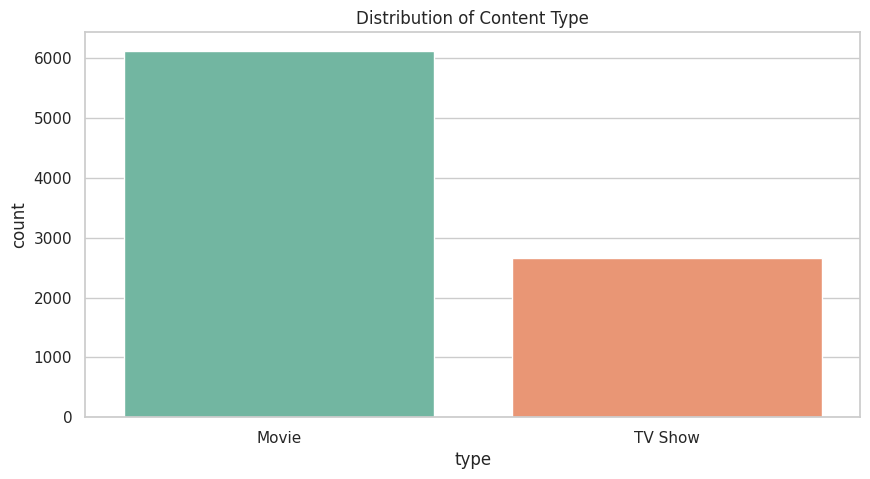

In [7]:
sns.countplot(x='type', data=data, palette='Set2')
plt.title("Distribution of Content Type")
plt.show()

# 2. Most Common Genres

/tmp/ipython-input-8-2304030325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


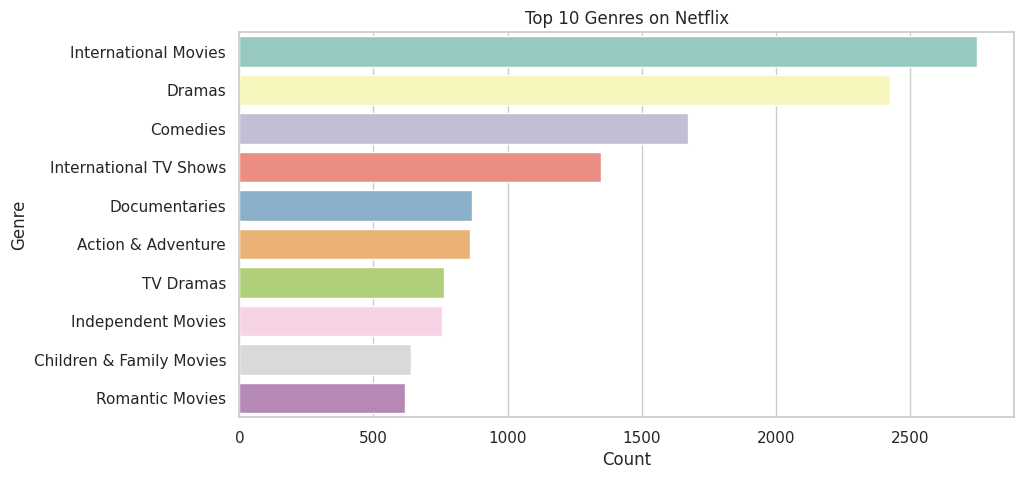

In [8]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# 3. Content Added Over the Years

/tmp/ipython-input-9-3210608693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=data, palette='coolwarm')


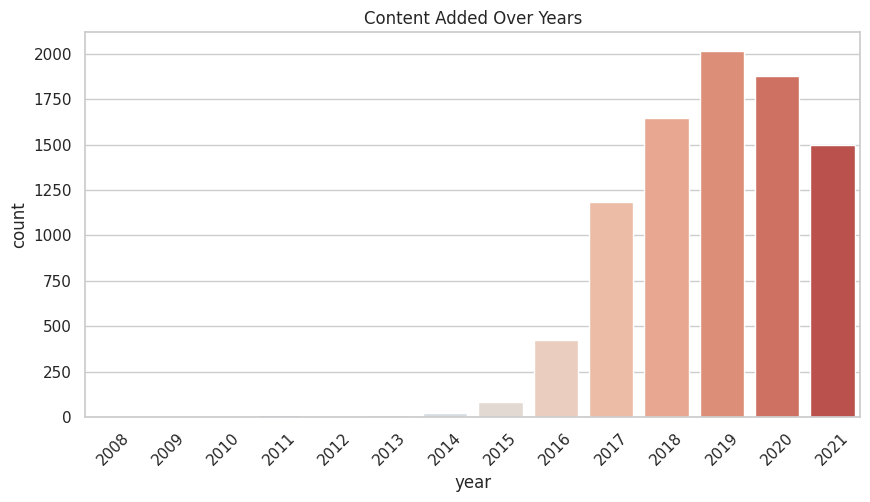

In [9]:
sns.countplot(x='year', data=data, palette='coolwarm')
plt.title("Content Added Over Years")
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Directors

/tmp/ipython-input-10-3908787735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


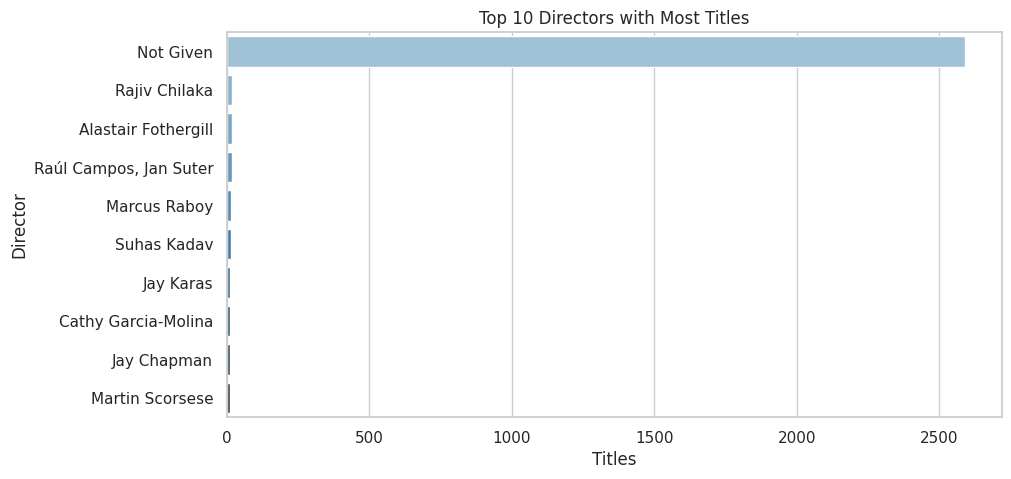

In [10]:
top_directors = data['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Titles")
plt.ylabel("Director")
plt.show()

# 5. Ratings Distribution

/tmp/ipython-input-11-1561821654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='Set1')


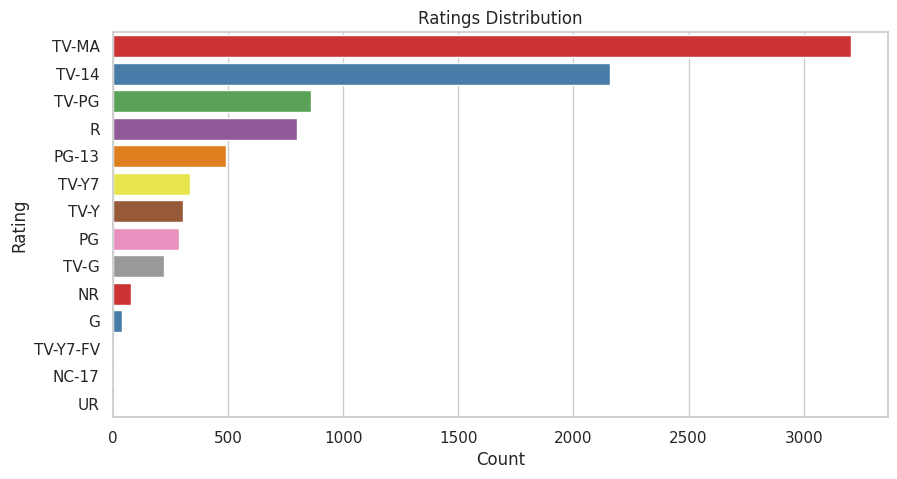

In [11]:
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='Set1')
plt.title("Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# 6. WordCloud of Movie Titles

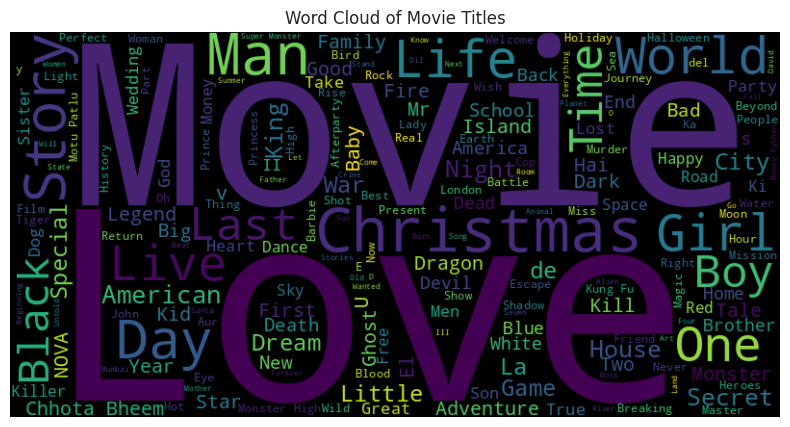

In [12]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()

# 7. Monthly & Yearly Releases

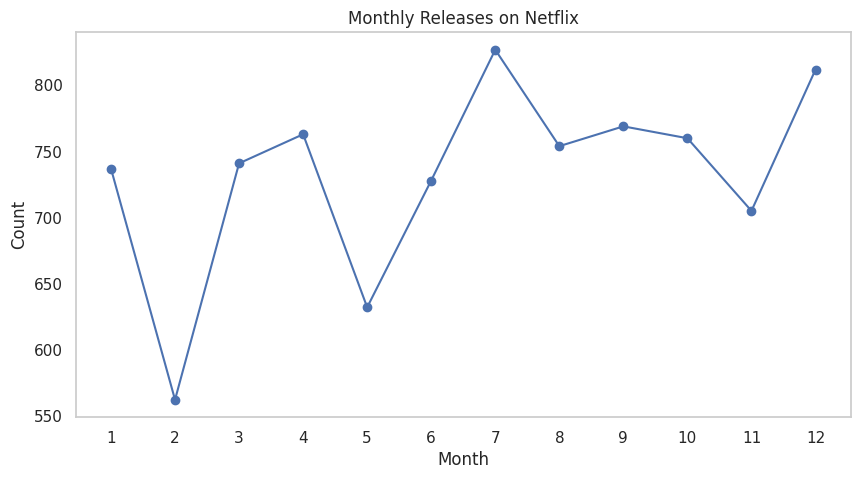

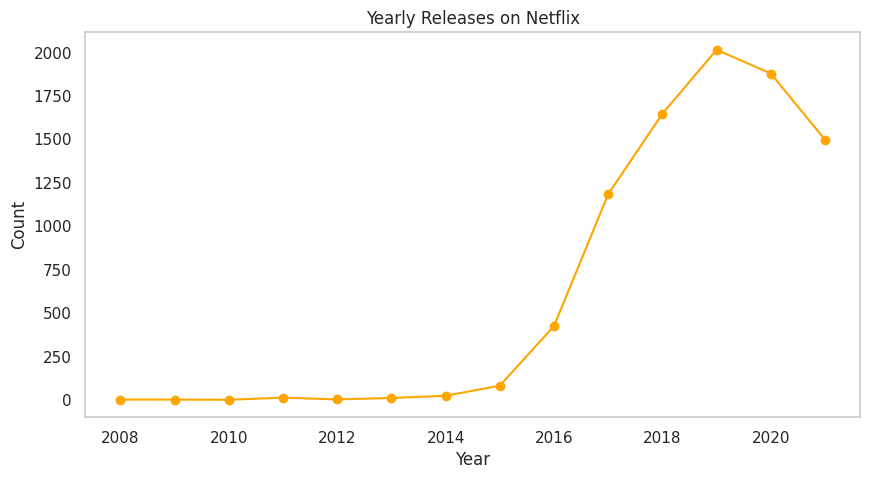

In [13]:
monthly = data['month'].value_counts().sort_index()
yearly = data['year'].value_counts().sort_index()
# Monthly
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1,13))
plt.grid()
plt.show()

# Yearly
plt.plot(yearly.index, yearly.values, marker='o', color='orange')
plt.title("Yearly Releases on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

# 8. Top 10 Countries

/tmp/ipython-input-14-607725499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


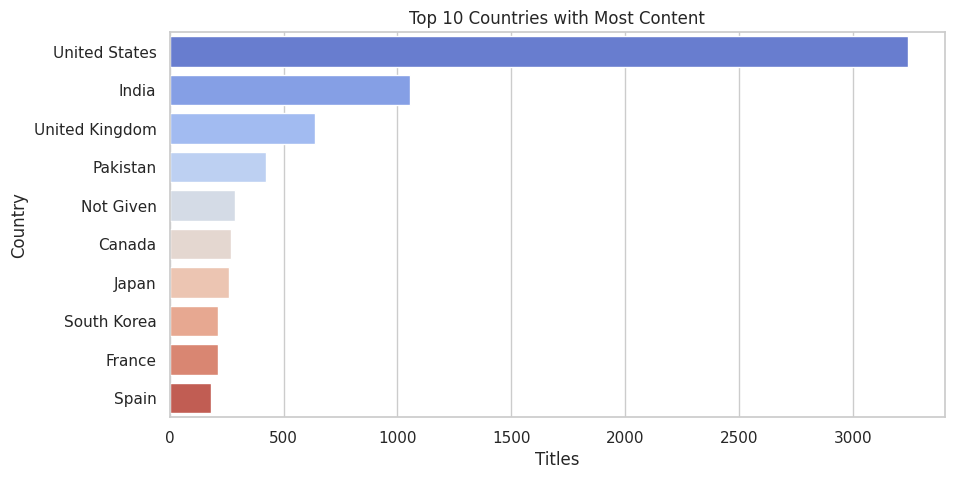

In [14]:
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Titles")
plt.ylabel("Country")
plt.show()

# 9. Time Trend by Content Type (Movies vs TV Shows Yearly)

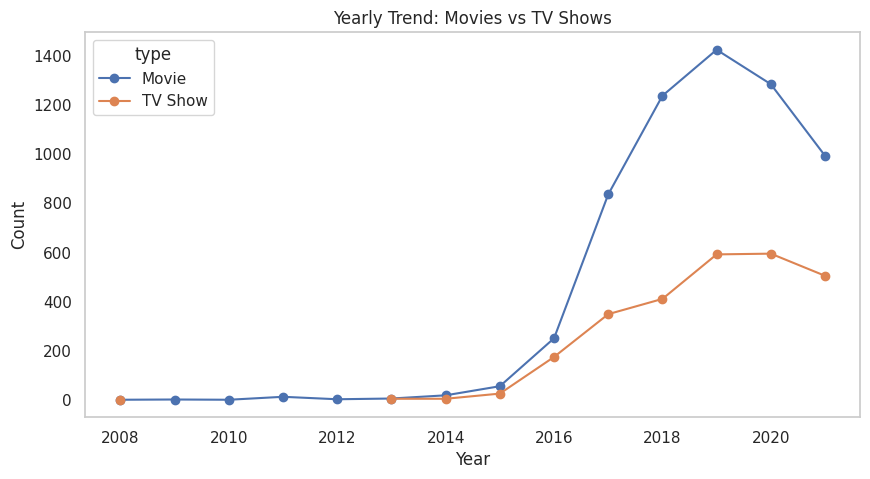

In [15]:
# Grouping data by year and type to compare trends of Movies and TV Shows
type_year = data.groupby(['year', 'type']).size().unstack()

# Plotting the trend
type_year.plot(marker='o')
plt.title("Yearly Trend: Movies vs TV Shows")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

# 10. Average Duration of Movies

/tmp/ipython-input-16-420135942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)


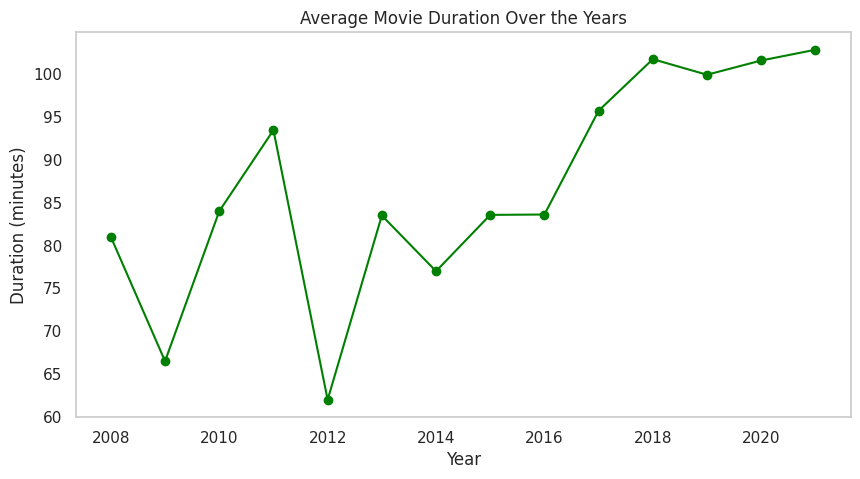

In [16]:
# Filter only Movies and extract numeric duration
movies = data[data['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

# Plotting average movie duration over the years
avg_duration = movies.groupby('year')['duration_min'].mean()

plt.plot(avg_duration.index, avg_duration.values, marker='o', color='green')
plt.title("Average Movie Duration Over the Years")
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.grid()
plt.show()

#  11. Heatmap of Content Added by Month and Year

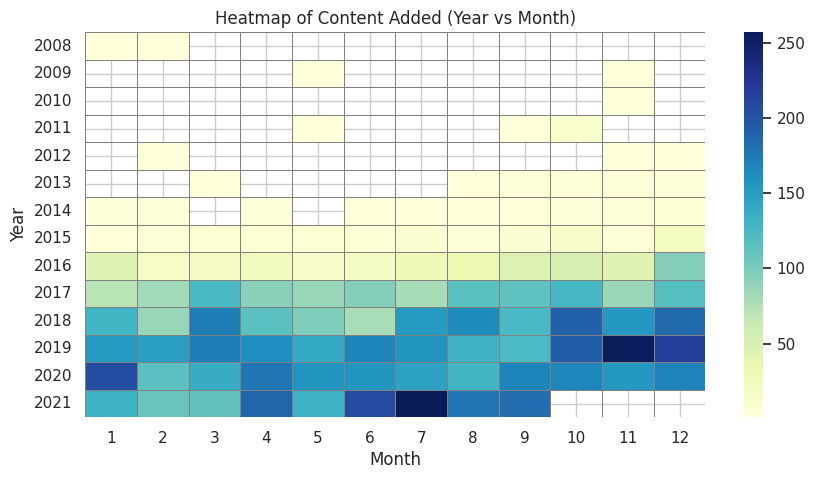

In [18]:
# Pivot table for heatmap
heatmap_data = data.pivot_table(index='year', columns='month', values='title', aggfunc='count')

# Heatmap Visualization
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Content Added (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

#  12. Pie Chart: Movies vs TV Shows Proportion

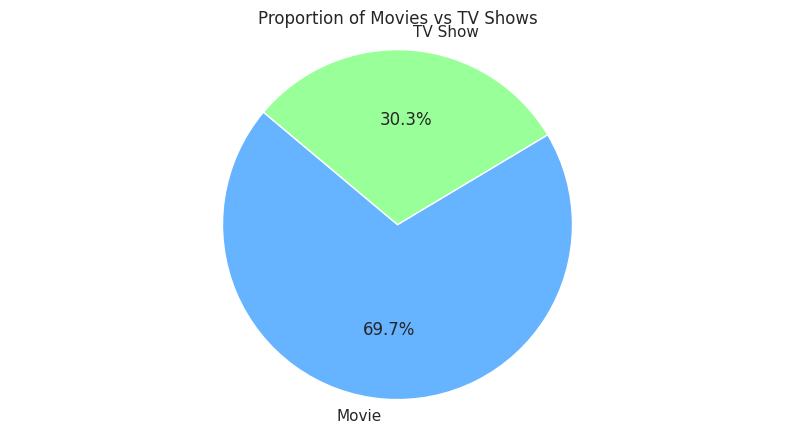

In [19]:
# Pie chart for content type distribution
type_counts = data['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=140)
plt.title("Proportion of Movies vs TV Shows")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# 13. Correlation Between Content Rating and Content Type

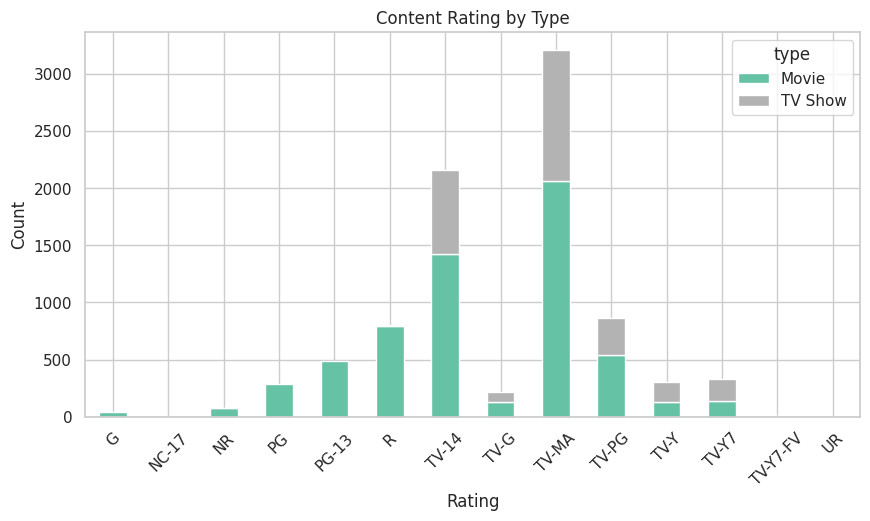

In [20]:
# Cross-tabulation of Rating and Type
rating_type = pd.crosstab(data['rating'], data['type'])

# Bar chart
rating_type.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Content Rating by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Create a list of all actors (cast column)
data['cast'] = data['cast'].fillna('')
data['actors'] = data['cast'].apply(lambda x: x.split(', '))

# Flatten list of actors
all_actors = sum(data['actors'], [])
top_actors = pd.Series(all_actors).value_counts().head(10)

# Plotting
sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Appearances")
plt.ylabel("Actor")
plt.show()

KeyError: 'cast'